In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns',8000)
pd.set_option('display.max_rows',7000)

In [4]:
train=pd.read_csv('train.csv')

In [5]:
train.head()


employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [6]:
train.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [7]:
train.shape

(54808, 14)

In [8]:
(train.isna().sum()/train.shape[0])*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [9]:
train[train['education'].isna()]

employee_id         department     region education gender  \
10           29934         Technology  region_23       NaN      m   
21           33332         Operations  region_15       NaN      m   
32           35465  Sales & Marketing   region_7       NaN      f   
43           17423  Sales & Marketing   region_2       NaN      m   
82           66013  Sales & Marketing   region_2       NaN      m   
87           69094  Sales & Marketing   region_2       NaN      m   
90           62658  Sales & Marketing   region_2       NaN      f   
189           6254         Operations   region_2       NaN      f   
204          60761         Operations  region_16       NaN      f   
231          57235  Sales & Marketing  region_26       NaN      m   
245          24414                R&D   region_2       NaN      m   
277          55550          Analytics  region_27       NaN      m   
323          45496  Sales & Marketing   region_2       NaN      m   
336           5128         Operations   region_2       NaN      m   
352          69715         Operations   region_2       NaN      f   
354          56139  Sales & Marketing  region_16       NaN      m   
359          36936  Sales & Marketing  region_28       NaN      m   
365          72765         Operations   region_2       NaN      f   
397           6711  Sales & Marketing   region_6       NaN      m   
415          67946          Analytics  region_32       NaN      m   
416          41763  Sales & Marketing  region_26       NaN      m   
475          36691  Sales & Marketing  region_14       NaN      m   
508           6788  Sales & Marketing   region_2       NaN      f   
514          15369          Analytics  region_22       NaN      f   
570          62499         Operations   region_2       NaN      f   
574          20516  Sales & Marketing   region_2       NaN      m   
586          22660  Sales & Marketing  region_27       NaN      m   
589          29142  Sales & Marketing  region_31       NaN      m   
597          47584        Procurement   region_2       NaN      f   
609          30088         Operations   region_2       NaN      m   
629            109         Technology  region_27       NaN      m   
670          65257  Sales & Marketing   region_2       NaN      m   
678          40019          Analytics  region_27       NaN      m   
690          28851        Procurement   region_2       NaN      f   
699          70961  Sales & Marketing   region_7       NaN      m   
714           6099  Sales & Marketing  region_22       NaN      f   
738          10377  Sales & Marketing  region_22       NaN      m   
793          34642  Sales & Marketing   region_2       NaN      m   
794          38439        Procurement   region_2       NaN      f   
817          68530         Operations   region_9       NaN      m   
843          66950  Sales & Marketing   region_2       NaN      m   
866           8926  Sales & Marketing  region_31       NaN      m   
867          35744  Sales & Marketing  region_28       NaN      m   
880          63754          Analytics  region_31       NaN      m   
887          53048          Analytics  region_31       NaN      m   
892          31205         Operations   region_2       NaN      f   
903          66596  Sales & Marketing  region_25       NaN      m   
919          49815  Sales & Marketing   region_7       NaN      m   
947          54208  Sales & Marketing  region_15       NaN      m   
1015         23436         Technology   region_2       NaN      f   
1079         76325  Sales & Marketing  region_27       NaN      m   
1119         37770  Sales & Marketing  region_31       NaN      m   
1123         72720  Sales & Marketing  region_15       NaN      m   
1139         57220  Sales & Marketing  region_14       NaN      m   
1160         14613         Operations   region_2       NaN      f   
1169         36805          Analytics  region_29       NaN      m   
1175         35480  Sales & Marketing   region_2       NaN      m   
1181 

In [10]:
train[train['education'].isna()]['is_promoted'].value_counts()

0    2287
1     122
Name: is_promoted, dtype: int64

In [11]:
train[train['education'].notna()]['is_promoted'].value_counts()

0    47853
1     4546
Name: is_promoted, dtype: int64

In [12]:
train[train['education'].isna()]['no_of_trainings'].value_counts()

1    2061
2     279
3      50
4      14
5       4
6       1
Name: no_of_trainings, dtype: int64

In [14]:
train[train['education'].isna()]['region'].value_counts()

region_2     846
region_22    320
region_7     219
region_15    191
region_26    100
region_31     94
region_28     84
region_32     84
region_27     84
region_13     56
region_16     55
region_9      48
region_25     34
region_23     28
region_11     24
region_14     23
region_29     19
region_6      14
region_1      14
region_30     13
region_8      13
region_19     10
region_17      9
region_21      8
region_5       7
region_10      4
region_4       2
region_3       2
region_12      2
region_24      1
region_20      1
Name: region, dtype: int64

In [15]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [16]:
train[train['education'].isna()]['avg_training_score'].mean()

58.156496471564964

In [17]:
train[train['education'].notna()]['avg_training_score'].mean()

63.62720662608065

In [18]:
train[train['education'].isna()]['KPIs_met >80%'].mean()

0.24699045246990453

In [19]:
train[train['education'].notna()]['KPIs_met >80%'].mean()

0.3568007023034791

In [20]:
train[train['education'].isna()]['previous_year_rating'].mean()

3.130434782608696

In [21]:
train[train['education'].notna()]['previous_year_rating'].mean()

3.3375256884504725

In [22]:
train[train['education'].isna()]['length_of_service'].mean()

4.407222914072229

In [23]:
train[train['education'].notna()]['length_of_service'].mean()

5.932555964808489

In [24]:
train[train['education'].isna()]['department'].value_counts()

Sales & Marketing    1575
Analytics             337
Operations            226
Technology             99
Procurement            72
Finance                36
HR                     32
R&D                    28
Legal                   4
Name: department, dtype: int64

In [25]:
train[train['education'].notna()]['department'].value_counts()

Sales & Marketing    15265
Operations           11122
Procurement           7066
Technology            7039
Analytics             5015
Finance               2500
HR                    2386
Legal                 1035
R&D                    971
Name: department, dtype: int64

In [26]:
train[train['previous_year_rating'].isna()]

employee_id         department     region         education gender  \
10           29934         Technology  region_23               NaN      m   
23           71177        Procurement   region_5        Bachelor's      m   
29           74759  Sales & Marketing   region_4        Bachelor's      m   
56           45709  Sales & Marketing  region_31        Bachelor's      f   
58           26599  Sales & Marketing  region_16        Bachelor's      m   
62            9150          Analytics  region_22        Bachelor's      f   
66           77981            Finance  region_22        Bachelor's      m   
67           16502  Sales & Marketing  region_22        Bachelor's      m   
84           44575              Legal   region_7        Bachelor's      m   
89            9589  Sales & Marketing  region_31        Bachelor's      f   
90           62658  Sales & Marketing   region_2               NaN      f   
96           64109         Technology  region_26        Bachelor's      f   
111          51444                 HR  region_13        Bachelor's      f   
123          41746         Operations  region_22        Bachelor's      f   
125           5461          Analytics   region_8        Bachelor's      m   
127          66874  Sales & Marketing  region_27        Bachelor's      f   
135           5102         Operations   region_7        Bachelor's      m   
141          50593            Finance  region_23        Bachelor's      m   
160          45157                 HR   region_4        Bachelor's      m   
178          28314            Finance  region_26        Bachelor's      m   
214          17833          Analytics   region_4        Bachelor's      m   
220          43676        Procurement   region_2        Bachelor's      m   
232          22300                 HR  region_20        Bachelor's      m   
242          42636  Sales & Marketing  region_26        Bachelor's      m   
245          24414                R&D   region_2               NaN      m   
255          15737            Finance  region_22        Bachelor's      m   
272          35873              Legal   region_2   Below Secondary      m   
313          11892        Procurement  region_12        Bachelor's      f   
316          22511         Technology  region_24        Bachelor's      m   
334          74579         Operations   region_2   Below Secondary      m   
371           6587        Procurement  region_13        Bachelor's      m   
374          56233          Analytics  region_22        Bachelor's      f   
381           9192         Operations  region_21        Bachelor's      m   
386          36460         Operations  region_13        Bachelor's      m   
389          64798          Analytics  region_22        Bachelor's      m   
427          22462  Sales & Marketing  region_32        Bachelor's      f   
430          10002                 HR   region_2   Below Secondary      m   
436           5640          Analytics   region_2        Bachelor's      m   
471          53981         Operations   region_5        Bachelor's      m   
475          36691  Sales & Marketing  region_14               NaN      m   
492          57033         Operations   region_2        Bachelor's      m   
508           6788  Sales & Marketing   region_2               NaN      f   
517          30155          Analytics  region_32        Bachelor's      m   
518          59337          Analytics  region_22  Master's & above      m   
522            573                R&D  region_22        Bachelor's      f   
531          54550         Technology   region_8        Bachelor's      f   
532          31552  Sales & Marketing  region_21        Bachelor's      m   
542          63667        Procurement  region_26        Bachelor's      m   
553          18621  Sales & Marketing   region_2        Bachelor's      f   
566           5272         Operations   region_2   Below Secondary      f   
567          49389              Legal  region_27   Below Secondary      m   
577

In [27]:
train[train['previous_year_rating'].isna()]['is_promoted'].value_counts()

0    3785
1     339
Name: is_promoted, dtype: int64

In [28]:
train[train['previous_year_rating'].isna()]['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

In [29]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [30]:
### imputing missing values of 'previous_year_rating'

In [7]:
Fill_value=0
train['previous_year_rating']=train['previous_year_rating'].fillna(Fill_value)

In [8]:
### imputing missing values of 'education'

In [9]:
Fill_value='hd'
train['education']=train['education'].fillna(Fill_value)

In [34]:
train.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

0    50140
1     4668
Name: is_promoted, dtype: int64


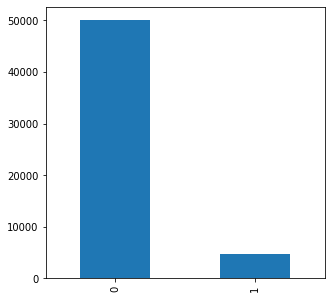

In [35]:
print(train['is_promoted'].value_counts())
train['is_promoted'].value_counts().plot(kind='bar',figsize=(5,5))


In [12]:
for col in ['department','region','education','gender','recruitment_channel']:
    lbl=LabelEncoder()
    train[col]=lbl.fit_transform(train[col])

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from collections import Counter
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report, precision_score 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [13]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ClassificationReport

In [27]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [14]:
predictors=['department', 'region', 'education', 'gender','recruitment_channel', 'no_of_trainings', 'age', 
            'previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score']

target=['is_promoted']

In [15]:
X=train[predictors].values
y=train[target].values

In [16]:
classes = ["0", "1"]

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']

**************************************************
The roc_auc_score on Train  0.7087564373099339
The roc_auc_score on Test 0.6787587134286698
The Precision Score  0.9388304193368142
The Recall Score 0.9417077175697866
The F1 Score  0.9302374578875224
**************************************************
The roc_auc_score on Train  0.7144546334440326
The roc_auc_score on Test 0.6744615393370953
The Precision Score  0.9374963625972079
The Recall Score 0.9407739887240681
The F1 Score  0.9289541063403725
**************************************************
The roc_auc_score on Train  0.7078633605763178
The roc_auc_score on Test 0.6771596491317119
The Precision Score  0.9398162221845711
The Recall Score 0.9419782144616563
The F1 Score  0.9302529766795357


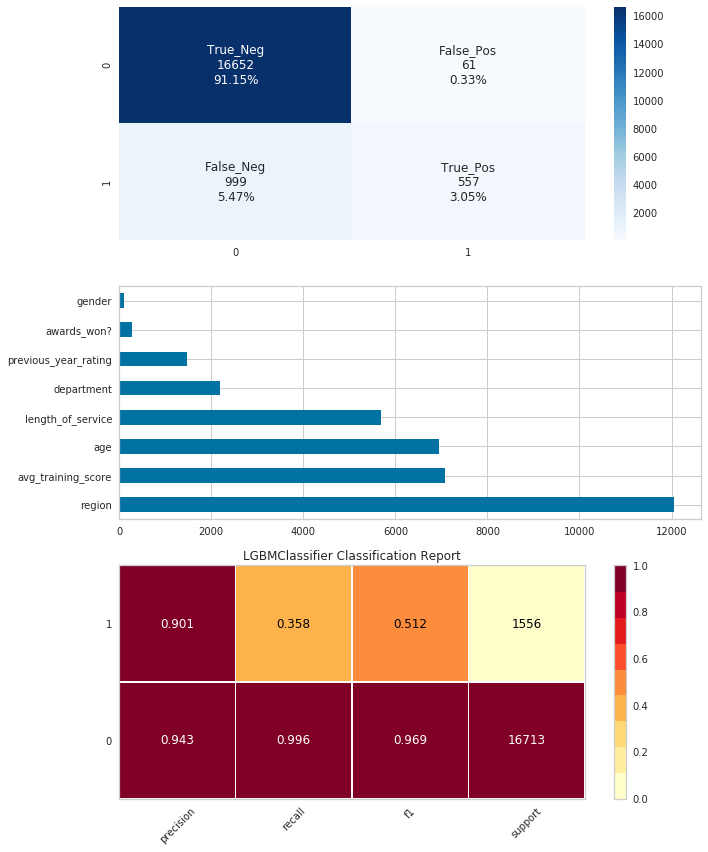

In [143]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=3, random_state=500, shuffle=True)
f,(ax1,ax2,ax3)=plt.subplots(3)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf=LGBMClassifier( max_depth =-1, n_estimators = 1800, reg_lambda = 1.2, reg_alpha = 1.2, min_child_weight = 1, 
    learning_rate = 0.1, colsample_bytree = 0.5)
    model=clf.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    print('*'*50)
    print("The roc_auc_score on Train ",roc_auc_score(y_train,pred_train,average='weighted'))
    print("The roc_auc_score on Test",roc_auc_score(y_test,pred_test,average='weighted'))
    print("The Precision Score ",precision_score(y_test,pred_test,average='weighted'))
    print("The Recall Score", recall_score(y_test,pred_test,average = 'weighted'))
    print("The F1 Score ",   f1_score(y_test,pred_test,average = 'weighted'))
    class_report=classification_report(y_test,pred_test)
    conf_matrix=confusion_matrix(y_test,pred_test)
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax1)
feautreimportance=pd.Series(model.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='barh',figsize=(10,12), ax=ax2)
visualizer = ClassificationReport(clf, classes=classes, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show(ax=ax3)

In [ ]:
### XGBOOST classifier

**************************************************
The roc_auc_score on Train  0.6735372277921766
The roc_auc_score on Test 0.666910701427865
The Precision Score  0.9431904452676436
The Recall Score 0.9421638387155629
The F1 Score  0.9290605783270021
**************************************************
The roc_auc_score on Train  0.6727213347351572
The roc_auc_score on Test 0.6650186757592659
The Precision Score  0.9441392948136825
The Recall Score 0.9422550629447182
The F1 Score  0.9288767233421312
**************************************************
The roc_auc_score on Train  0.6785508142813405
The roc_auc_score on Test 0.6544983468130776
The Precision Score  0.9405287261106251
The Recall Score 0.9398832329866813
The F1 Score  0.9255375999790668
**************************************************
The roc_auc_score on Train  0.6756792426987567
The roc_auc_score on Test 0.6637751380806838
The Precision Score  0.9422031364195058
The Recall Score 0.9415199343125628
The F1 Score  0.9281488020

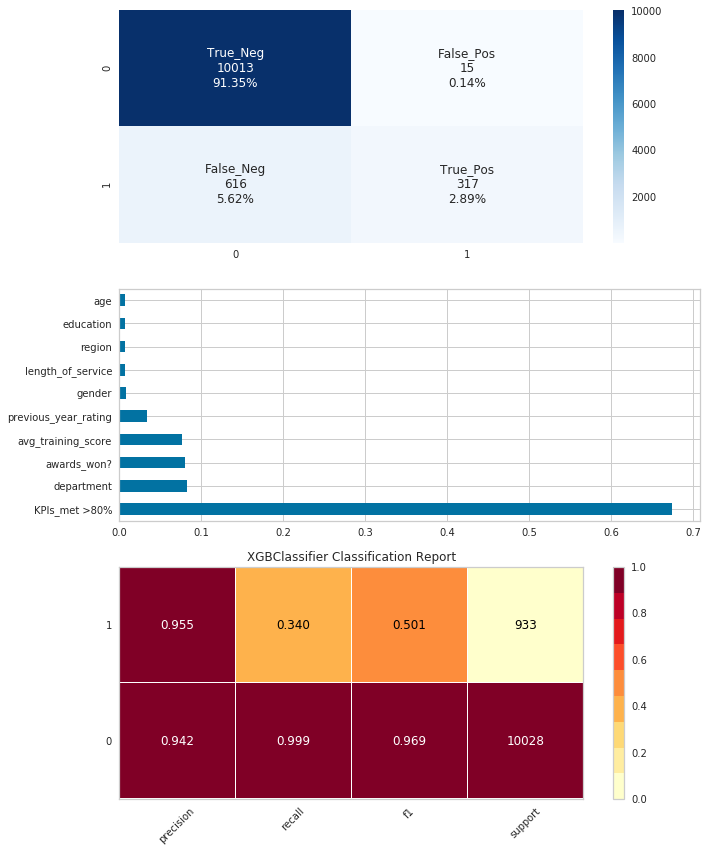

In [162]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=200, shuffle=True)
f,(ax1,ax2,ax3)=plt.subplots(3)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1=XGBClassifier(eval_metric='error',objective='binary:logistic',eta=0.01,max_depth=7,n_estimators=600,
                       colsample_bytree=0.8,reg_alpha=0.5,reg_lambda=0.3)
    model=clf1.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    print('*'*50)
    print("The roc_auc_score on Train ",roc_auc_score(y_train,pred_train,average='weighted'))
    print("The roc_auc_score on Test",roc_auc_score(y_test,pred_test,average='weighted'))
    print("The Precision Score ",precision_score(y_test,pred_test,average='weighted'))
    print("The Recall Score", recall_score(y_test,pred_test,average = 'weighted'))
    print("The F1 Score ",   f1_score(y_test,pred_test,average = 'weighted'))
    class_report=classification_report(y_test,pred_test)
    conf_matrix=confusion_matrix(y_test,pred_test)
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax1)
feautreimportance=pd.Series(model.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='barh',figsize=(10,12), ax=ax2)
visualizer = ClassificationReport(clf1, classes=classes, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show(ax=ax3)

In [ ]:
### Randomforestclassifier

**************************************************
The roc_auc_score on Train  0.5659743906136198
The roc_auc_score on Test 0.5633554740516704
The Precision Score  0.9264625628088415
The Recall Score 0.9250136836343733
The F1 Score  0.897885990552891
**************************************************
The roc_auc_score on Train  0.5649373372126338
The roc_auc_score on Test 0.5636546363971031
The Precision Score  0.9305241344375554
The Recall Score 0.9255610290093049
The F1 Score  0.8982682534462636
**************************************************
The roc_auc_score on Train  0.5658622047340826
The roc_auc_score on Test 0.5611144256467331
The Precision Score  0.9246870379668791
The Recall Score 0.9244663382594417
The F1 Score  0.8970182994657866
**************************************************
The roc_auc_score on Train  0.5643003939705105
The roc_auc_score on Test 0.5648818891241715
The Precision Score  0.9250347841767076
The Recall Score 0.9250980749931575
The F1 Score  0.8983690120

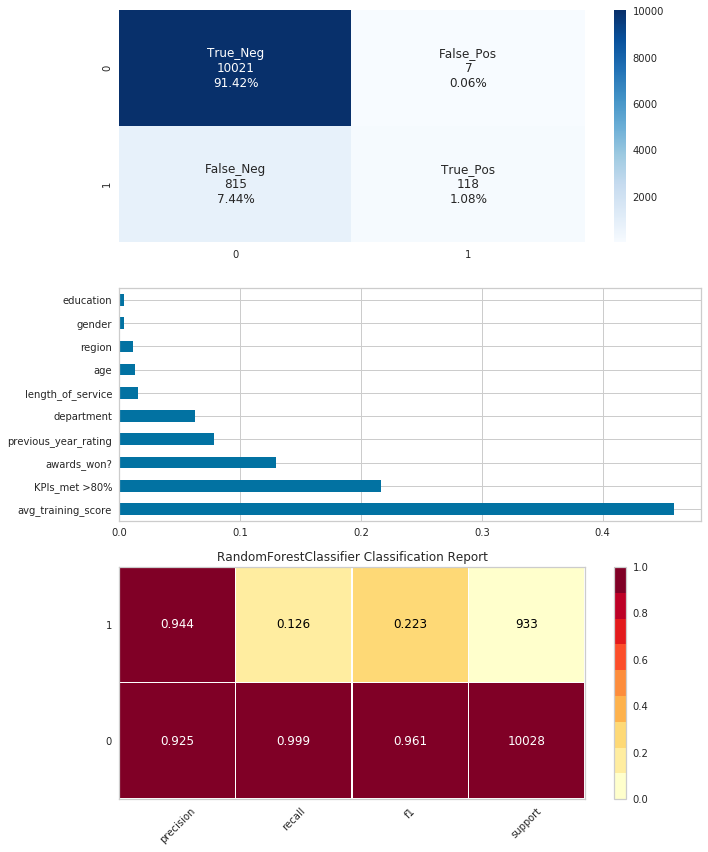

In [157]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=200, shuffle=True)
f,(ax1,ax2,ax3)=plt.subplots(3)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf3=RandomForestClassifier(n_estimators=1200, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=35,
                                min_impurity_decrease=0.0, min_impurity_split=None)
    model=clf3.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    print('*'*50)
    print("The roc_auc_score on Train ",roc_auc_score(y_train,pred_train,average='weighted'))
    print("The roc_auc_score on Test",roc_auc_score(y_test,pred_test,average='weighted'))
    print("The Precision Score ",precision_score(y_test,pred_test,average='weighted'))
    print("The Recall Score", recall_score(y_test,pred_test,average = 'weighted'))
    print("The F1 Score ",   f1_score(y_test,pred_test,average = 'weighted'))
    class_report=classification_report(y_test,pred_test)
    conf_matrix=confusion_matrix(y_test,pred_test)
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax1)
feautreimportance=pd.Series(model.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='barh',figsize=(10,12), ax=ax2)
visualizer = ClassificationReport(clf3, classes=classes, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show(ax=ax3)

In [ ]:
### Naive Bayes

**************************************************
The roc_auc_score on Train  0.6600264706064582
The roc_auc_score on Test 0.6460811227492358
The Precision Score  0.8806811737686592
The Recall Score 0.8205619412515964
The F1 Score  0.8457375942617716
**************************************************
The roc_auc_score on Train  0.6590683472458156
The roc_auc_score on Test 0.6667622946969044
The Precision Score  0.885874319845852
The Recall Score 0.8273125342090859
The F1 Score  0.851476419541793
**************************************************
The roc_auc_score on Train  0.6588201869794035
The roc_auc_score on Test 0.656367951320884
The Precision Score  0.8834201155598537
The Recall Score 0.8269476372924649
The F1 Score  0.8505346066385511
**************************************************
The roc_auc_score on Train  0.6644507827881131
The roc_auc_score on Test 0.6499407767575547
The Precision Score  0.8814804850797503
The Recall Score 0.8157102454155643
The F1 Score  0.842930470365

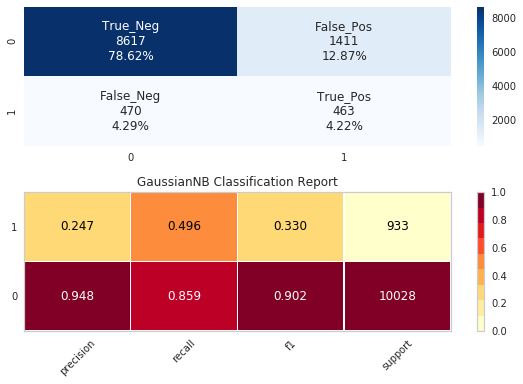

In [29]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=200, shuffle=True)
f,(ax1,ax2)=plt.subplots(2)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf4=GaussianNB(var_smoothing=0.00009,priors=[0.56,0.44])
    model=clf4.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    print('*'*50)
    print("The roc_auc_score on Train ",roc_auc_score(y_train,pred_train,average='weighted'))
    print("The roc_auc_score on Test",roc_auc_score(y_test,pred_test,average='weighted'))
    print("The Precision Score ",precision_score(y_test,pred_test,average='weighted'))
    print("The Recall Score", recall_score(y_test,pred_test,average = 'weighted'))
    print("The F1 Score ",   f1_score(y_test,pred_test,average = 'weighted'))
    class_report=classification_report(y_test,pred_test)
    conf_matrix=confusion_matrix(y_test,pred_test)
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax1)
#feautreimportance=pd.Series(model.feature_importances_, index=predictors)
#feautreimportance.nlargest(10).plot(kind='barh',figsize=(10,12), ax=ax2)
visualizer = ClassificationReport(clf4, classes=classes, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show(ax=ax2)

In [ ]:
## ensemble 

**************************************************
The roc_auc_score on Train  0.7266443059593823
The roc_auc_score on Test 0.6245406865060485
The Precision Score  0.9192481608737072
The Recall Score 0.9294836708629812
The F1 Score  0.9132271818418407
**************************************************
The roc_auc_score on Train  0.7269495105723257
The roc_auc_score on Test 0.6395299798679329
The Precision Score  0.9232064800678905
The Recall Score 0.9320379492793286
The F1 Score  0.9174329058046076
**************************************************
The roc_auc_score on Train  0.7445501350904131
The roc_auc_score on Test 0.640737092458034
The Precision Score  0.9220977856367386
The Recall Score 0.9315818281335523
The F1 Score  0.9172857609523614
**************************************************
The roc_auc_score on Train  0.7760185236358278
The roc_auc_score on Test 0.6655195035893069
The Precision Score  0.9318147460101063
The Recall Score 0.9375969345862604
The F1 Score  0.9253251967

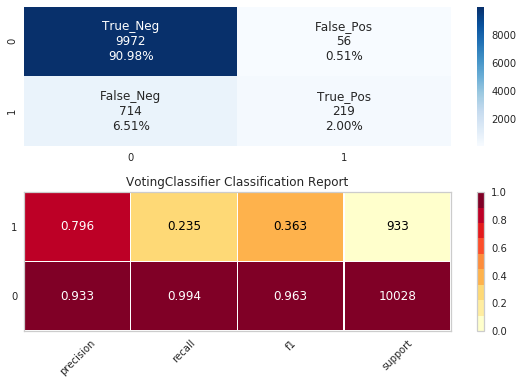

In [35]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=200, shuffle=True)
f,(ax1,ax2)=plt.subplots(2)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb=GaussianNB(var_smoothing=0.00009,priors=[0.56,0.44])
    xgb=XGBClassifier(eval_metric='error',objective='binary:logistic',eta=0.1,max_depth=7,n_estimators=800,colsample_bytree=0.8,reg_alpha=0.5,reg_lambda=0.3)
    lgb=LGBMClassifier( max_depth =-1, n_estimators = 800, reg_lambda = 1.2, reg_alpha = 1.2, min_child_weight = 1,learning_rate = 0.1, colsample_bytree = 0.5)
    sgd=SGDClassifier(loss='log', penalty='l2', alpha=0.01, l1_ratio=0.01,max_iter=1100,class_weight='balanced')
    vr=VotingClassifier(estimators=[('GNB', gnb), ('XGB',xgb), ('LGB',lgb),('SGD',sgd)], voting='hard')
    model=vr.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    print('*'*50)
    print("The roc_auc_score on Train ",roc_auc_score(y_train,pred_train,average='weighted'))
    print("The roc_auc_score on Test",roc_auc_score(y_test,pred_test,average='weighted'))
    print("The Precision Score ",precision_score(y_test,pred_test,average='weighted'))
    print("The Recall Score", recall_score(y_test,pred_test,average = 'weighted'))
    print("The F1 Score ",   f1_score(y_test,pred_test,average = 'weighted'))
    class_report=classification_report(y_test,pred_test)
    conf_matrix=confusion_matrix(y_test,pred_test)
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax1)
visualizer = ClassificationReport(vr, classes=classes, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show(ax=ax2)

In [ ]:
###CatBoost

**************************************************
The roc_auc_score on Train  0.8600109102653972
The roc_auc_score on Test 0.8045298645591061
The Precision Score  0.9225336928229217
The Recall Score 0.7187557015143222
The F1 Score  0.7805360934232227
The Classification Report               precision    recall  f1-score   support

           0       0.99      0.70      0.82     10028
           1       0.22      0.91      0.35       934

    accuracy                           0.72     10962
   macro avg       0.60      0.80      0.59     10962
weighted avg       0.92      0.72      0.78     10962

**************************************************
The roc_auc_score on Train  0.859110211813991
The roc_auc_score on Test 0.8199705706249482
The Precision Score  0.9263233824933744
The Recall Score 0.7256887429301223
The F1 Score  0.7858918078549614
The Classification Report               precision    recall  f1-score   support

           0       0.99      0.71      0.82     10028
         

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


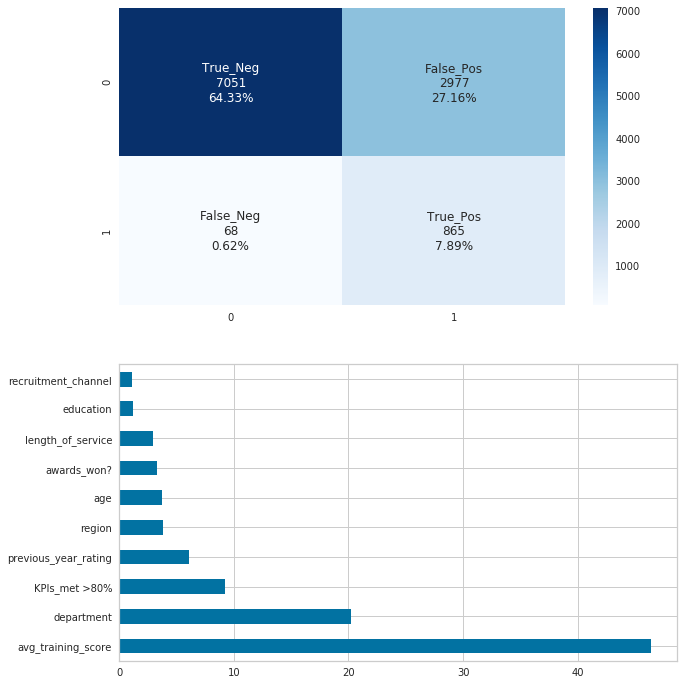

In [31]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=200, shuffle=True)
f,(ax1,ax2)=plt.subplots(2)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf5=CatBoostClassifier(verbose=False,iterations=500,learning_rate=0.01,depth=10,custom_metric='AUC',l2_leaf_reg=3.0,
                           bootstrap_type='Bayesian',bagging_temperature=0.8,sampling_frequency='PerTreeLevel',grow_policy='Depthwise',
                           leaf_estimation_method='Gradient',class_weights=[0.1, 4],
                           model_shrink_mode='Constant')
    model=clf5.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    print('*'*50)
    print("The roc_auc_score on Train ",roc_auc_score(y_train,pred_train,average='weighted'))
    print("The roc_auc_score on Test",roc_auc_score(y_test,pred_test,average='weighted'))
    print("The Precision Score ",precision_score(y_test,pred_test,average='weighted'))
    print("The Recall Score", recall_score(y_test,pred_test,average = 'weighted'))
    print("The F1 Score ",   f1_score(y_test,pred_test,average = 'weighted'))
    class_report=classification_report(y_test,pred_test)
    conf_matrix=confusion_matrix(y_test,pred_test)
    print("The Classification Report",class_report)
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax1)
feautreimportance=pd.Series(model.feature_importances_, index=predictors)
feautreimportance.nlargest(10).plot(kind='barh',figsize=(10,12), ax=ax2)


In [33]:
model_pkl=pd.to_pickle(model,'cat.pkl')

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [23]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [27]:
over = SMOTE(sampling_strategy=0.18)
X_res, y_res = over.fit_resample(X, y)
#counter_y = Counter(np.array(y))
counter_y_res=Counter(y_res)
print(counter_y_res)



Counter({0: 50140, 1: 9025})


In [29]:
### After SMOTE Technique , Tried Ensemble Technique

**************************************************
The roc_auc_score on Train  0.7788310321128541
The roc_auc_score on Test 0.7383878878751683
The Precision Score  0.9163050841857622
The Recall Score 0.9154060677765571
The F1 Score  0.903862949071216
**************************************************
The roc_auc_score on Train  0.7670193955539448
The roc_auc_score on Test 0.7217895432953934
The Precision Score  0.9122213652684658
The Recall Score 0.9107580495225217
The F1 Score  0.8972512951505607
**************************************************
The roc_auc_score on Train  0.7634695359917438
The roc_auc_score on Test 0.71373414826298
The Precision Score  0.908857910524456
The Recall Score 0.9078847291472999
The F1 Score  0.8934756917217709
**************************************************
The roc_auc_score on Train  0.8228698149336982
The roc_auc_score on Test 0.7699169748526841
The Precision Score  0.9255678043244916
The Recall Score 0.9249556325530297
The F1 Score  0.9164980921477

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


**************************************************
The roc_auc_score on Train  0.7599875404269707
The roc_auc_score on Test 0.71373414826298
The Precision Score  0.908857910524456
The Recall Score 0.9078847291472999
The F1 Score  0.8934756917217709


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


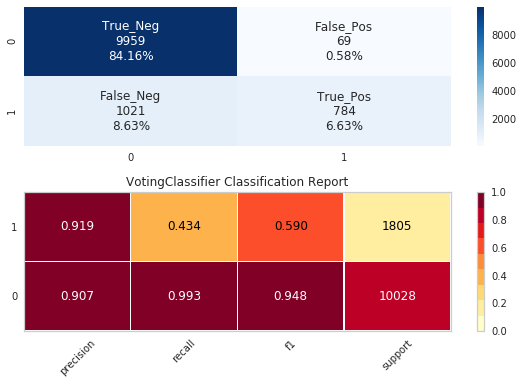

In [28]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=200, shuffle=True)
f,(ax1,ax2)=plt.subplots(2)
for train_index, test_index in skf.split(X_res,y_res):
    X_train, X_test = X_res[train_index], X_res[test_index]
    y_train, y_test = y_res[train_index], y_res[test_index]
    gnb=GaussianNB(var_smoothing=0.00009,priors=[0.56,0.44])
    xgb=XGBClassifier(eval_metric='error',objective='binary:logistic',eta=0.1,max_depth=7,n_estimators=800,colsample_bytree=0.8,reg_alpha=0.5,reg_lambda=0.3)
    lgb=LGBMClassifier( max_depth =-1, n_estimators = 800, reg_lambda = 1.2, reg_alpha = 1.2, min_child_weight = 1,learning_rate = 0.1, colsample_bytree = 0.5)
    sgd=SGDClassifier(loss='log', penalty='l2', alpha=0.01, l1_ratio=0.01,max_iter=1100,class_weight='balanced')
    vr=VotingClassifier(estimators=[('GNB', gnb), ('XGB',xgb), ('LGB',lgb),('SGD',sgd)], voting='hard')
    model_res=vr.fit(X_train,y_train)
    pred_train=model_res.predict(X_train)
    pred_test=model_res.predict(X_test)
    print('*'*50)
    print("The roc_auc_score on Train ",roc_auc_score(y_train,pred_train,average='weighted'))
    print("The roc_auc_score on Test",roc_auc_score(y_test,pred_test,average='weighted'))
    print("The Precision Score ",precision_score(y_test,pred_test,average='weighted'))
    print("The Recall Score", recall_score(y_test,pred_test,average = 'weighted'))
    print("The F1 Score ",   f1_score(y_test,pred_test,average = 'weighted'))
    class_report=classification_report(y_test,pred_test)
    conf_matrix=confusion_matrix(y_test,pred_test)
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax1)
visualizer = ClassificationReport(vr, classes=classes, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show(ax=ax2)

In [45]:
test=pd.read_csv('test.csv')

In [46]:
test.head()

employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0            0                  51  
2                  4              0            0                  47  
3                  9              0            0                  65  
4                  7              0            0                  61

In [32]:
(test.isna().sum()/test.shape[0])*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [57]:
for col in ['department','region','education','gender','recruitment_channel']:
    lbl=LabelEncoder()
    test[col]=lbl.fit_transform(test[col])

In [55]:
Fill_value=0
test['previous_year_rating']=test['previous_year_rating'].fillna(Fill_value)

In [56]:
Fill_value='hd'
test['education']=test['education'].fillna(Fill_value)

In [36]:
model_cat=pd.read_pickle('cat.pkl')

In [49]:
test.head(2)

employee_id  department     region   education gender recruitment_channel  \
0         8724  Technology  region_26  Bachelor's      m            sourcing   
1        74430          HR   region_4  Bachelor's      f               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   24                   NaN                  1   
1                1   31                   3.0                  5   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  77            1  
1              0            0                  51            0

In [44]:
Test_X=test[predictors].values
pred_value=model_cat.predict(Test_X)

In [48]:
test['is_promoted']=pred_value

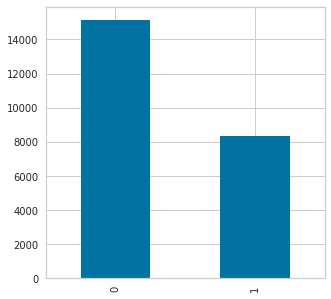

In [51]:
test['is_promoted'].value_counts().plot(kind='bar',figsize=(5,5))

In [53]:
GroupedData_train=train.groupby(['is_promoted']).mean()
GroupedData_train

employee_id  department     region  education    gender  \
is_promoted                                                             
0            39187.520423    4.972696  15.405325   0.688213  0.703929   
1            39285.092331    4.973865  15.682948   0.723008  0.685733   

             recruitment_channel  no_of_trainings        age  \
is_promoted                                                    
0                       0.867491         1.257639  34.844037   
1                       0.875321         1.203299  34.372965   

             previous_year_rating  length_of_service  KPIs_met >80%  \
is_promoted                                                           
0                        3.021221           5.879398       0.319685   
1                        3.696658           5.716367       0.698800   

             awards_won?  avg_training_score  
is_promoted                                   
0               0.014180           62.647686  
1               0.119751           71.325193

In [58]:
GroupedData_test=test.groupby(['is_promoted']).mean()
GroupedData_test

employee_id  department     region  education    gender  \
is_promoted                                                             
0            39037.601121    5.081794  15.393799   0.723615  0.721438   
1            39048.311285    4.759304  15.595918   0.661945  0.679352   

             recruitment_channel  no_of_trainings        age  \
is_promoted                                                    
0                       0.878232         1.283047  35.166557   
1                       0.847419         1.201801  34.084754   

             previous_year_rating  length_of_service  KPIs_met >80%  \
is_promoted                                                           
0                        2.736873           6.052045       0.071504   
1                        3.708884           5.370588       0.881753   

             awards_won?  avg_training_score  
is_promoted                                   
0               0.005937           61.532388  
1               0.053421           66.412965

In [62]:
feautreimportance=pd.Series(model_cat.feature_importances_, index=predictors)
feautreimportance.nlargest(10)


avg_training_score      46.351572
department              20.262733
KPIs_met >80%            9.259557
previous_year_rating     6.110544
region                   3.804491
age                      3.779037
awards_won?              3.292149
length_of_service        2.967628
education                1.209793
recruitment_channel      1.167304
dtype: float64

In [63]:
Final_test=test.to_csv('Final_test.csv',index=False)

## conclusions


As we can see from the test data  amd model validation that feautres those were important to classify 
an employee to be promoted/Not.

we can see that avg_training_score , department,KPIs_met >80% & previous_year_rating are the key factors  for promotion 